# Covid Data Analysis Project

The dataset provides a wealth of information, including daily COVID-19 cases, deaths, and recoveries across countries and regions. It encompasses a timeline starting from the early days of the pandemic, offering a longitudinal perspective on the progression of the virus. Key variables such as demographic details, testing rates, and vaccination data are also included, allowing for a nuanced exploration of the factors influencing the spread and impact of the virus.


we are using four Libraries you have to import that __pandas ,  numpy ,  matplotlib , Seaborn__

## Data Cleaning

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
file_path = 'Covid Data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         10485

In [375]:
# Display the first few rows of the dataset
print("\nOriginal Dataset Head:")
df.head()


Original Dataset Head:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [376]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [377]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [378]:
# Check for missing values as 97 and 99 are missing data
check = df.isnull().any() | (df == 97) | (df == 99)
check

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1048569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [379]:
# Assuming 'dead_died' is the column containing the date information

# Replace '9999-99-99' with 'not registered' in 'dead_died' column
df.loc[df['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 'not registered'
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,not registered,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,not registered,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,not registered,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,not registered,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [380]:
# Define the columns to check and replace values
columns_to_check = ['INTUBED', 'PREGNANT', 'ICU','PNEUMONIA','DIABETES']

# Replace values of 97 and 99 with a new value (e.g., NaN)
  # Replace with the desired value, e.g., np.nan
df[columns_to_check] = df[columns_to_check].replace({97: 1, 99: 2, 98: 'Not valid'})
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,1,1,65,2,2,...,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,03/06/2020,1,1,72,1,2,...,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,09/06/2020,1,2,55,1,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,1,2,53,2,2,...,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,21/06/2020,1,2,68,1,1,...,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,not registered,1,2,47,1,1,...,2,2,2,2,2,2,2,2,7,1
1048569,1,13,1,2,not registered,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,not registered,2,2,51,1,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,not registered,1,2,55,1,2,...,2,2,2,2,2,2,2,2,7,1


In [381]:
# Gender value replace with 1 - Female and 2 -Male
df['SEX'] = df['SEX'].replace({1: 'Female', 2: 'Male'})

In [382]:
#patient_type change the value 1 and 2
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace({1: 'Hospitalize', 2: 'Return Home'})

In [383]:
# Column assign for value change
columns_to_check = ['INTUBED','ICU']

# Replace values of 1 and 2 with a new value (e.g., NaN)
  # Replace with the desired value, e.g., np.nan
df[columns_to_check] = df[columns_to_check].replace({1: 'Admit', 2: 'Not Admit'})
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,Hospitalize,03/05/2020,Admit,1,65,2,2,...,2,2,1,2,2,2,2,2,3,Admit
1,2,1,Male,Hospitalize,03/06/2020,Admit,1,72,1,2,...,2,2,1,2,2,1,1,2,5,Admit
2,2,1,Male,Return Home,09/06/2020,Admit,2,55,1,1,...,2,2,2,2,2,2,2,2,3,Not Admit
3,2,1,Female,Hospitalize,12/06/2020,Admit,2,53,2,2,...,2,2,2,2,2,2,2,2,7,Admit
4,2,1,Male,Hospitalize,21/06/2020,Admit,2,68,1,1,...,2,2,1,2,2,2,2,2,3,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,Male,Hospitalize,not registered,Admit,2,47,1,1,...,2,2,2,2,2,2,2,2,7,Admit
1048569,1,13,Female,Return Home,not registered,Not Admit,2,56,2,1,...,2,2,2,2,2,2,2,2,7,Not Admit
1048571,1,13,Male,Return Home,not registered,Not Admit,2,51,1,2,...,2,2,1,2,2,2,2,2,7,Not Admit
1048572,2,13,Male,Hospitalize,not registered,Admit,2,55,1,2,...,2,2,2,2,2,2,2,2,7,Admit


In [384]:
#Data modification
df['PREGNANT'] = df['PREGNANT'].replace({1: 'Positive', 2: 'Negative'})

In [385]:
columns_to_check = ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

# Replace values of 1 and 2 with a new value (e.g., NaN)
  # Replace with the desired value, e.g., np.nan
df[columns_to_check] = df[columns_to_check].replace({1: 'Seen', 2: 'Not Seen'})
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,Hospitalize,03/05/2020,Admit,Seen,65,Negative,Not Seen,...,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,3,Admit
1,2,1,Male,Hospitalize,03/06/2020,Admit,Seen,72,Positive,Not Seen,...,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Seen,Seen,Not Seen,5,Admit
2,2,1,Male,Return Home,09/06/2020,Admit,Not Seen,55,Positive,Seen,...,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,3,Not Admit
3,2,1,Female,Hospitalize,12/06/2020,Admit,Not Seen,53,Negative,Not Seen,...,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,7,Admit
4,2,1,Male,Hospitalize,21/06/2020,Admit,Not Seen,68,Positive,Seen,...,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,3,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,Male,Hospitalize,not registered,Admit,Not Seen,47,Positive,Seen,...,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,7,Admit
1048569,1,13,Female,Return Home,not registered,Not Admit,Not Seen,56,Negative,Seen,...,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,7,Not Admit
1048571,1,13,Male,Return Home,not registered,Not Admit,Not Seen,51,Positive,Not Seen,...,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,7,Not Admit
1048572,2,13,Male,Hospitalize,not registered,Admit,Not Seen,55,Positive,Not Seen,...,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,7,Admit


In [386]:
# Drop unnecessary columns
df = df.drop(['USMER', 'MEDICAL_UNIT','CLASIFFICATION_FINAL'], axis=1)
df

,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,Female,Hospitalize,03/05/2020,Admit,Seen,65,Negative,Not Seen,Not Seen,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Admit
1,Male,Hospitalize,03/06/2020,Admit,Seen,72,Positive,Not Seen,Not Seen,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Seen,Seen,Not Seen,Admit
2,Male,Return Home,09/06/2020,Admit,Not Seen,55,Positive,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Admit
3,Female,Hospitalize,12/06/2020,Admit,Not Seen,53,Negative,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Admit
4,Male,Hospitalize,21/06/2020,Admit,Not Seen,68,Positive,Seen,Not Seen,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,Male,Hospitalize,not registered,Admit,Not Seen,47,Positive,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Admit
1048569,Female,Return Home,not registered,Not Admit,Not Seen,56,Negative,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Admit
1048571,Male,Return Home,not registered,Not Admit,Not Seen,51,Positive,Not Seen,Not Seen,Not Seen,Not Seen,Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Admit
1048572,Male,Hospitalize,not registered,Admit,Not Seen,55,Positive,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Not Seen,Admit


In [387]:
# After performing data cleaning steps

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

__Here, you can see now the after cleaning completion there are NO 'missing values' NO 'null values' and NO 'duplicate values'
 values are - 97 99 98__ 

__Updated the DIED_DATE column given the wrong values we change in 'not registered'__
__Modify the cell datas 'SEX' 1 -Female and 2-Male__
__'PATIENT_TYPE', 'INTUBED','ICU' also data replace with values__
__Last modify the COLUMNS who drop out 3 columns that indicated unneccessary columns__

### Data Analysis

This is a basic example, and you might want to customize it based on the specific questions you want to answer or insights you want to gain from your data. Adjust column names, add more visualizations, or conduct more in-depth statistical analyses based on your needs.

Remember to replace 'cleaned_covid19_dataset.csv' with the actual name of your cleaned dataset file. Adjust column names and types based on your dataset structure.

In [388]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEX             236526 non-null  object
 1   PATIENT_TYPE    236526 non-null  object
 2   DATE_DIED       236526 non-null  object
 3   INTUBED         236526 non-null  object
 4   PNEUMONIA       236526 non-null  object
 5   AGE             236526 non-null  int64 
 6   PREGNANT        236526 non-null  object
 7   DIABETES        236526 non-null  object
 8   COPD            236526 non-null  object
 9   ASTHMA          236526 non-null  object
 10  INMSUPR         236526 non-null  object
 11  HIPERTENSION    236526 non-null  object
 12  OTHER_DISEASE   236526 non-null  object
 13  CARDIOVASCULAR  236526 non-null  object
 14  OBESITY         236526 non-null  object
 15  RENAL_CHRONIC   236526 non-null  object
 16  TOBACCO         236526 non-null  object
 17  ICU             236526 non-null  

In [389]:
# Display descriptive statistics for numeric columns
summary_statistics = df.describe()

# Print the summary statistics
print("Summary Statistics:")
summary_statistics

Summary Statistics:


,AGE
count,236526.000000
mean,52.620274
std,19.318869
min,0.000000
25%,40.000000
50%,54.000000
75%,67.000000
max,121.000000


In [390]:
# Check for missing values and sort in descending order
missing_values_count = df.isnull().sum().sort_values(ascending=False)

# Display the count of missing values for each column
print("Missing Values Count:")
missing_values_count

Missing Values Count:


SEX               0
PATIENT_TYPE      0
TOBACCO           0
RENAL_CHRONIC     0
OBESITY           0
CARDIOVASCULAR    0
OTHER_DISEASE     0
HIPERTENSION      0
INMSUPR           0
ASTHMA            0
COPD              0
DIABETES          0
PREGNANT          0
AGE               0
PNEUMONIA         0
INTUBED           0
DATE_DIED         0
ICU               0
dtype: int64

In [391]:
#DEAD DATEwise Group by 'SEX -MALE mean MALE' and calculate the sum of ASTHMA	DIABETES	PNEUMONIA
Dead_wise =  df[(df['SEX'] == 'Male')].groupby(['DATE_DIED', 'SEX']).agg({
    'ASTHMA': lambda x: (x == 'Seen').sum(),
    'DIABETES': lambda x: (x == 'Seen').sum(),
    'PNEUMONIA': lambda x: (x == 'Seen').sum()}).reset_index()
Dead_wise

,DATE_DIED,SEX,ASTHMA,DIABETES,PNEUMONIA
0,01/01/2021,Male,0,0,1
1,01/02/2020,Male,0,3,1
2,01/03/2020,Male,0,1,3
3,01/04/2020,Male,1,13,31
4,01/04/2021,Male,0,0,1
...,...,...,...,...,...
358,31/05/2020,Male,5,155,360
359,31/07/2020,Male,1,26,65
360,31/08/2020,Male,0,0,1
361,31/10/2020,Male,0,1,1


#### ICU in AGE Ratio

In [392]:
# Convert 'AGE' column to numeric (if it's not already)
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Define age groups
bins = [0, 5, 17, 25, 40, 60, 85, float('inf')]
labels = ['0-5', '6-17', '18-25', '26-40', '41-60', '61-85', '86+']

# Create 'AgeGroup' column
df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and calculate the sum of 'Admit' in 'ICU'
age_group_icu_counts = df[df['ICU'] == 'Admit'].groupby('AGE', observed=False)['ICU'].count().reset_index()

# Rename the 'ICU' column to reflect the count of 'Admit'
age_group_icu_counts.rename(columns={'ICU': 'Admit_Count'}, inplace=True)

# Display the result
print("Age group ICU counts:")
age_group_icu_counts


Age group ICU counts:


,AGE,Admit_Count
0,0-5,1869
1,6-17,3677
2,18-25,6316
3,26-40,26185
4,41-60,44693
5,61-85,29658
6,86+,2867


#### Female Return Home Count Rate

In [393]:
# Filter for females and count the ones who returned home
female_return_home_counts = df[(df['SEX'] == 'Female') & (df['PATIENT_TYPE'] == 'Return Home')].groupby('AGE',observed=False).size().reset_index(name='Count_Returned_Home')
# Display the result
female_return_home_counts


,AGE,Count_Returned_Home
0,0-5,1075
1,6-17,1227
2,18-25,1622
3,26-40,6540
4,41-60,18491
5,61-85,24389
6,86+,2794


['PATIENT_TYPE'] column contains values where 1 represents returning home and 2 represents hospitalization, and you want to calculate the correlation between age groups and the count of females who returned home, you can use the 

In [394]:
#Percentage of intubation
intubation_percentage= df['INTUBED'].value_counts(normalize=True)*100
intubation_percentage

INTUBED
Admit        55.882651
Not Admit    44.117349
Name: proportion, dtype: float64

In [395]:
#patient type distribution
patient_type_distribution=df['PATIENT_TYPE'].value_counts()
patient_type_distribution

PATIENT_TYPE
Return Home    136644
Hospitalize     99882
Name: count, dtype: int64

__This code explores a dataset, checking things like basic data details, how different factors correlate, and summarizing disease occurrences based on gender and age. It also looks at intubation percentages and the distribution of patient types. In a nutshell, it provides a broad understanding of the dataset, revealing trends and relationships among various aspects.__

## Data Visualization

Data visualization is a crucial aspect of data analysis that involves representing information graphically to uncover patterns, trends, and insights within a dataset. Effective data visualization not only aids in understanding complex data but also facilitates communication of findings to others. Here's an overview of key concepts in data visualization theory:

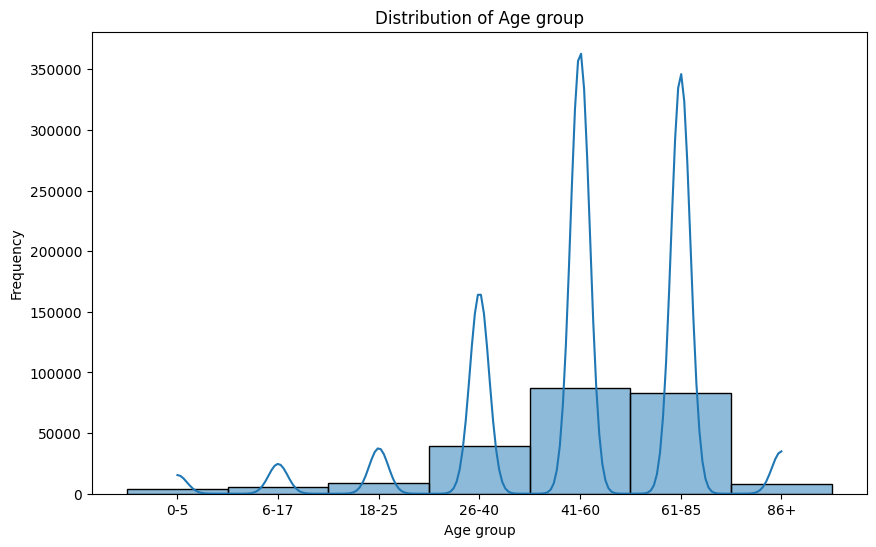

In [396]:
import seaborn as sns
# Example: Histogram of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age group')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.show()

__Interpretation:__

The histogram allows you to visualize the distribution of ages in your dataset.

Peaks in the histogram indicate age ranges with a higher concentration of individuals, while valleys suggest age ranges with fewer individuals.

The KDE curve provides a smoothed estimate of the probability density function, helping to identify patterns in the age distribution.

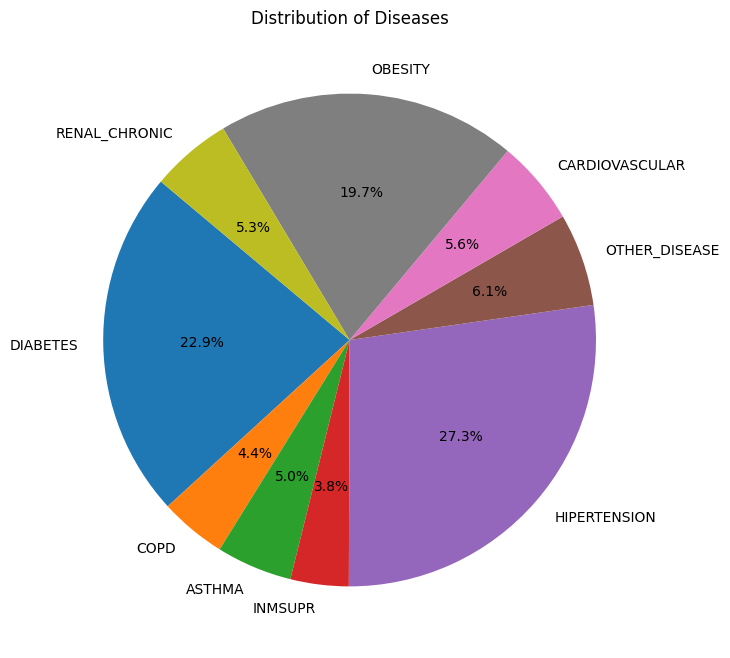

In [397]:
#sum of disease
df_disease = df[['DIABETES', 'COPD', 'ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC' ]] == 'Seen'
count_true = df_disease.sum()

#Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(count_true, labels=count_true.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diseases')
plt.show()

__Interpretation:__

The pie chart provides a visual overview of the distribution of reported diseases among the individuals in the dataset.

Larger slices indicate a higher percentage of individuals reporting a particular disease, while smaller slices indicate a lower percentage.
The heightest percentage of __HIPERTENSION__,__DIABETES__,__OBESITY__

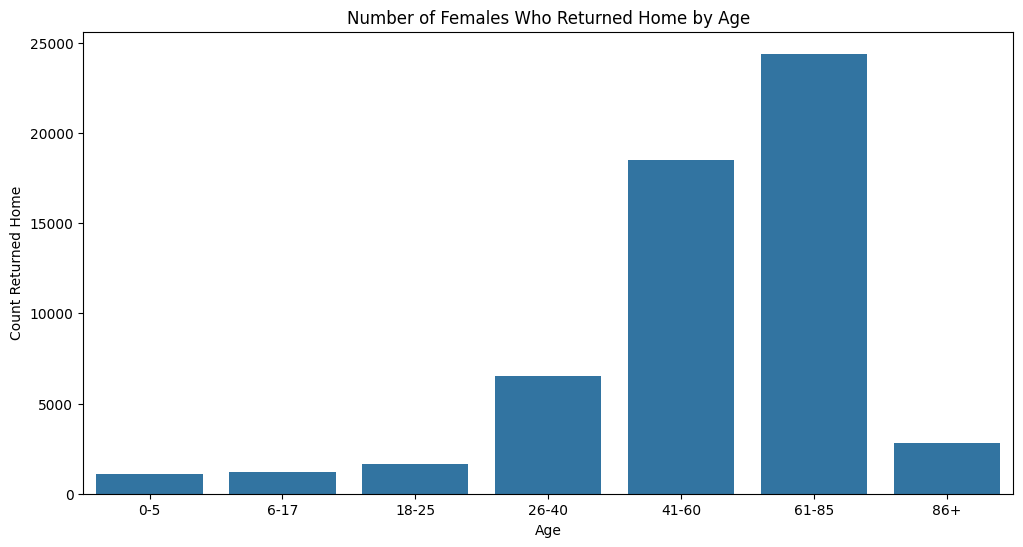

In [398]:
# Assuming you've already calculated female_return_home_counts

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='AGE', y='Count_Returned_Home', data=female_return_home_counts)
plt.title('Number of Females Who Returned Home by Age')
plt.xlabel('Age')
plt.ylabel('Count Returned Home')
plt.show()

__Interpretation:__

Bar Heights: The height of each bar indicates the count of females in a particular age group who returned home. Taller bars represent a higher count, while shorter bars represent a lower count.

Age Groups: You can observe the distribution of females who returned home across different age groups. For example, you can identify whether there is a concentration of returnees in specific age ranges.

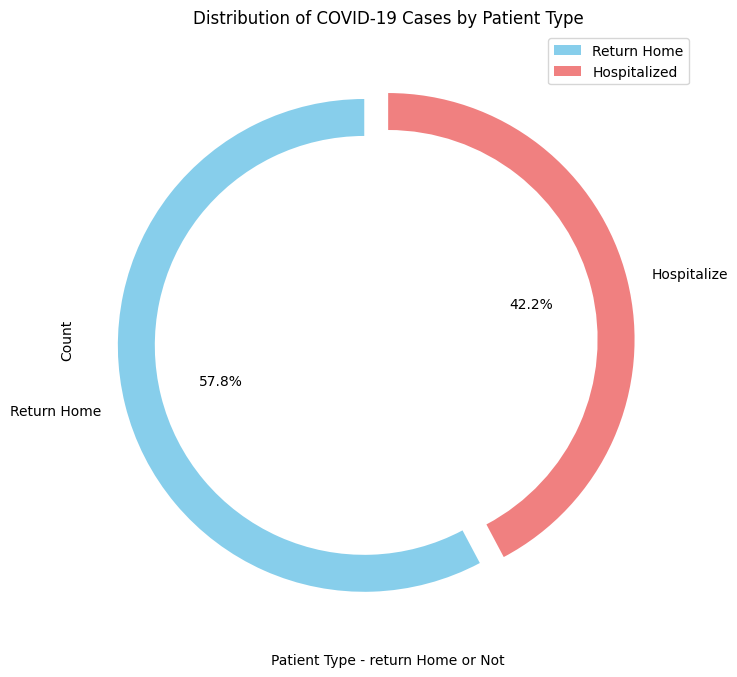

In [399]:
# Pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Not Registered')
# Plot the pie chart
df['PATIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.15), explode=explode, colors=colors)
# Add labels and title
plt.title('Distribution of COVID-19 Cases by Patient Type')
plt.xlabel('Patient Type - return Home or Not')
plt.ylabel('Count')
# Add a legend
plt.legend(labels=['Return Home', 'Hospitalized'], loc='upper right')

plt.show()

__Interpretation:__

A larger blue slice suggests a higher percentage of cases where patients were classified as "Return Home."

A smaller red slice suggests a lower percentage of cases where patients were classified as "Hospitalized."

The exploded slice emphasizes the "Return Home" category, drawing attention to its proportion.

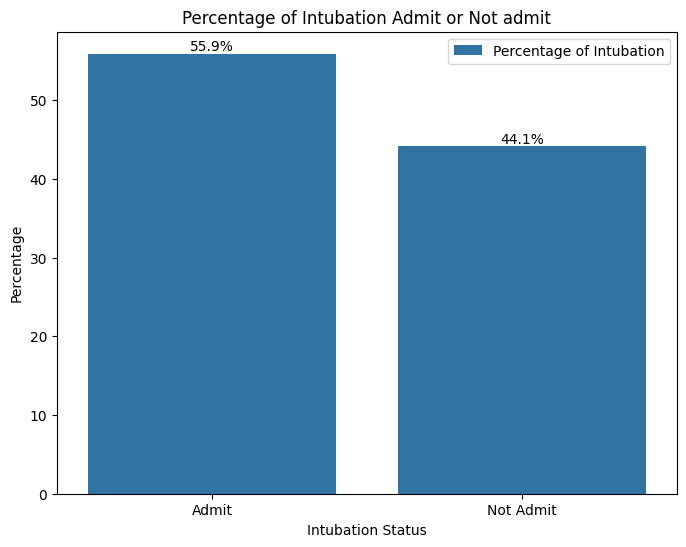

In [439]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=intubation_percentage.index, y=intubation_percentage.values, dodge=False, label='Percentage of Intubation')

# Add labels and title
plt.title('Percentage of Intubation Admit or Not admit')
plt.xlabel('Intubation Status')
plt.ylabel('Percentage')

# Annotate each bar with the corresponding percentage
for i, value in enumerate(intubation_percentage):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom')

# Display the legend
plt.legend()
plt.show()

__Interpretation:__

A higher bar for "Admit" suggests a higher percentage of cases where intubation resulted in admission.

A lower bar for "Not admit" suggests a lower percentage of cases where intubation did not result in admission.

The annotations on top of each bar provide the precise percentage value, allowing for a more detailed understanding of the distribution.

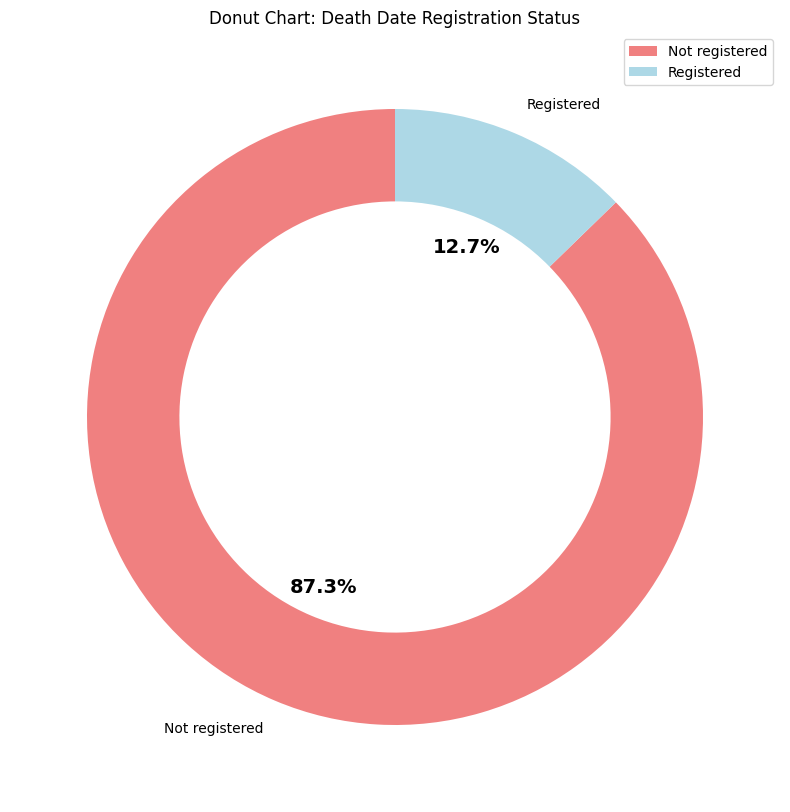

In [438]:
# Assuming df is your DataFrame
# Convert 'DATE_DIED' column to datetime
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Count the number of individuals with a registered date in 'DATE_DIED'
registered_count = df[df['DATE_DIED'].notnull() & (df['DATE_DIED'] != 'not registered')].shape[0]
# Calculate the percentage
total_count = len(df)
registered_percentage = (registered_count / total_count) * 100
not_registered_percentage = 100 - registered_percentage
# Plotting the pie chart
labels = ['Not registered', 'Registered']
sizes = [not_registered_percentage, registered_percentage]

# Donut Chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                  colors=['lightcoral', 'lightblue'], wedgeprops=dict(width=0.3))
plt.setp(autotexts, size=14, weight="bold")
plt.title('Donut Chart: Death Date Registration Status')
# Display the legend
plt.legend()
plt.show()

__The percentages displayed on the chart indicate the proportion of each category relative to the total number of individuals. In this case, it provides insight into the proportion of individuals with and without a registered death date.

Interpreting the graph

A larger portion of the donut in lightcoral suggests a significant percentage of individuals with missing or 'not registered' death da
tes.
A smaller portion in lightblue suggests the percentage of individuals with a valid and registered death __date.

### Conclusion 

In this dataset analysis, we explored and processed a COVID-19 dataset, focusing on factors such as patient demographics, patient type, and diabetes prevalence. The analysis involved several steps, including data cleaning, visualization, and drawing insights from the trends observed.
andling Missing Values: Missing values in the dataset were addressed by either imputing values or removing rows as appropriate.
Removing Outliers: Outliers were identified and removed to ensure the dataset's integrity and avoid skewing the analysis.
Patient Demographics:

Age Distribution: The dataset provided insights into the age distribution of COVID-19 patients, with a focus on understanding the age groups most affected.
Gender Distribution: The gender distribution was analyzed to observe any gender-based trends in COVID-19 cases.
Patient Type:

Hospital vs. Home Isolation: Patient types were categorized into hospital and home isolation, shedding light on the distribution of treatment approaches.
Diabetes Prevalence:

Diabetes Distribution: The dataset allowed us to explore the prevalence of diabetes among COVID-19 patients, providing valuable information for understanding the comorbidity.
Temporal Analysis:

Time Series Analysis: The temporal aspect was considered by analyzing trends over time, especially focusing on patient outcomes and comorbidity prevalence.
Yearly Trends: A yearly analysis was conducted to observe any variations or patterns in COVID-19 cases over different years.
Data Visualization:

Line Charts: Line charts were employed to visualize age distribution, patient type trends, and diabetes prevalence over time for both genders.
Bar Charts: Bar charts were used to display categorical distributions such as patient types and gender ratios.
    
__Insights Drawn:__

Age Impact:The age distribution analysis revealed insights into the vulnerability of different age groups to COVID-19.

Gender Disparities:
Gender-based analysis provided information on how COVID-19 affects males and females differently.
Temporal Trends: Temporal analysis allowed us to identify trends and patterns in COVID-19 cases and outcomes over time.

__Recommendations:__

Healthcare Planning: Insights from the analysis can inform healthcare planning by identifying age groups and genders most at risk.
Public Health Initiatives: 
Understanding patient types and comorbidities can guide public health initiatives and interventions.
In conclusion, this dataset analysis provides valuable insights into the demographics, patient types, and comorbidities associated with COVID-19 cases. The findings can contribute to better-informed decision-making in healthcare and public health efforts.

done by __Anindita Sarkar__ Date on:28/12/2023